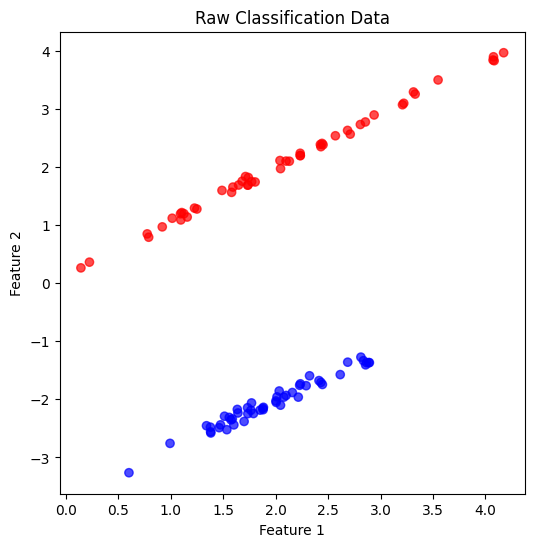

Theta range: 0.0 - 3.141592653589793
Phi range: 0.0 - 6.283185307179586


AttributeError: module 'pennylane.numpy' has no attribute 'mgrid'

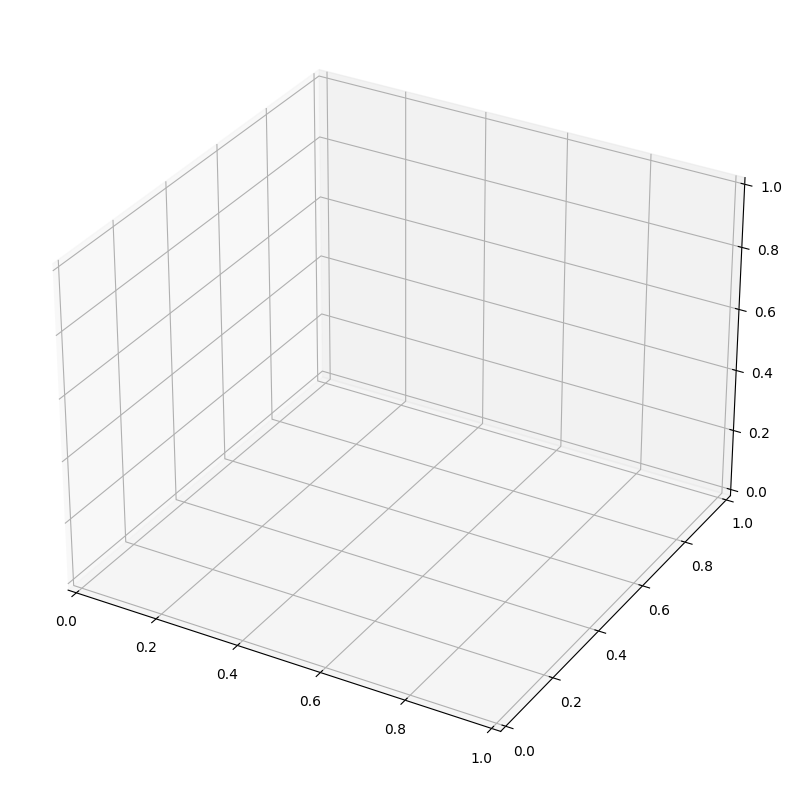

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

def encode_data_to_bloch(theta, phi):
    """Encodes theta and phi angles into a qubit state."""
    dev = qml.device('default.qubit', wires=1)

    @qml.qnode(dev)
    def circuit(theta, phi):
        qml.RY(theta, wires=0)
        qml.RZ(phi, wires=0)
        return qml.state()

    state = circuit(theta, phi)
    return state

def plot_bloch_sphere(states, labels=None, classes=None):
    """Plots the Bloch sphere with the given qubit states."""
    # Create a Bloch sphere
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Draw Bloch sphere
    u, v = np.mgrid[0:2*np.pi:60j, 0:np.pi:30j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="lightgray", linewidth=0.5, alpha=0.5)

    # Axes
    ax.quiver(0, 0, 0, 1.2, 0, 0, color='r', arrow_length_ratio=0.05)
    ax.quiver(0, 0, 0, 0, 1.2, 0, color='g', arrow_length_ratio=0.05)
    ax.quiver(0, 0, 0, 0, 0, 1.2, color='b', arrow_length_ratio=0.05)
    ax.text(1.3, 0, 0, 'X', color='r', fontsize=12)
    ax.text(0, 1.3, 0, 'Y', color='g', fontsize=12)
    ax.text(0, 0, 1.3, 'Z', color='b', fontsize=12)

    # Define colors for classes
    if classes is not None:
        unique_classes = np.unique(classes)
        colors = plt.cm.get_cmap('bwr', len(unique_classes))
        class_color_map = {cls: colors(i) for i, cls in enumerate(unique_classes)}
    else:
        class_color_map = {}

    # Plot each state
    for idx, state in enumerate(states):
        # Extract the coefficients
        alpha = state[0]
        beta = state[1]
        # Calculate Bloch sphere coordinates
        x = 2 * np.real(alpha.conj() * beta)
        y = 2 * np.imag(alpha.conj() * beta)
        z = np.abs(alpha)**2 - np.abs(beta)**2

        # Determine color based on class
        if classes is not None:
            color = class_color_map[classes[idx]]
        else:
            color = 'k'

        ax.scatter(x, y, z, color=color, s=50, alpha=0.8)

    # Create a legend if classes are provided
    if classes is not None:
        handles = [plt.Line2D([0], [0], marker='o', color='w',
                              markerfacecolor=class_color_map[cls], markersize=10)
                   for cls in unique_classes]
        ax.legend(handles, unique_classes, title="Classes")

    # Set labels and limits
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])
    ax.set_zlim([-1.2, 1.2])
    ax.set_xlabel('X', fontsize=14)
    ax.set_ylabel('Y', fontsize=14)
    ax.set_zlabel('Z', fontsize=14)
    plt.title("Bloch Sphere with Encoded Qubit States", fontsize=16)
    plt.show()

# ----------------------- Main Execution -----------------------

# Step 1: Generate synthetic classification data
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           class_sep=2,
                           random_state=42)

# Optional: Visualize the raw data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title("Raw Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 2: Normalize features to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Map scaled features to theta and phi
theta = X_scaled[:, 0] * np.pi        # θ ∈ [0, π]
phi = X_scaled[:, 1] * 2 * np.pi      # φ ∈ [0, 2π]

# Optional: Inspect mapped values
print("Theta range:", theta.min(), "-", theta.max())
print("Phi range:", phi.min(), "-", phi.max())

# Step 4: Encode each data point into a qubit state
encoded_states = []
for i in range(len(theta)):
    state = encode_data_to_bloch(theta[i], phi[i])
    encoded_states.append(state)

# Step 5: Plot the Bloch sphere with encoded states and class labels
plot_bloch_sphere(encoded_states, classes=y)
